<a href="https://colab.research.google.com/github/dinesh2018iitism/Learning-Data-Science-Using-AI-From-PW/blob/main/EDA_2_Assignment_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Car Sale Dataset

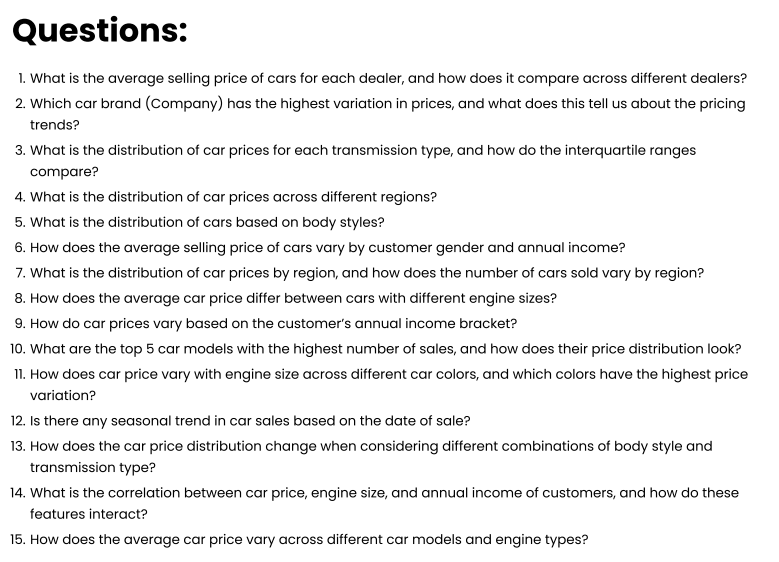

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/sample_data/Car Sale.csv'
car_data = pd.read_csv(file_path)

car_data.columns = car_data.columns.str.strip()
car_data.columns = car_data.columns.str.replace('Â', '')

In [8]:
# 2. Car brand with the highest variation in prices
price_variation = car_data.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Car Brand with Highest Variation in Prices:")
print(price_variation.head(1))

Car Brand with Highest Variation in Prices:
Company
Lincoln    19658.050211
Name: Price ($), dtype: float64


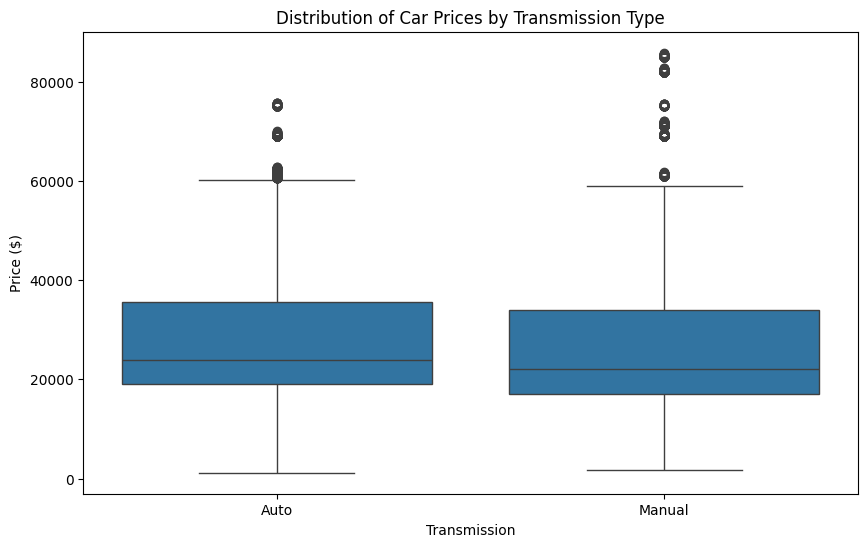

In [9]:
# 3. Distribution of car prices for each transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=car_data)
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()


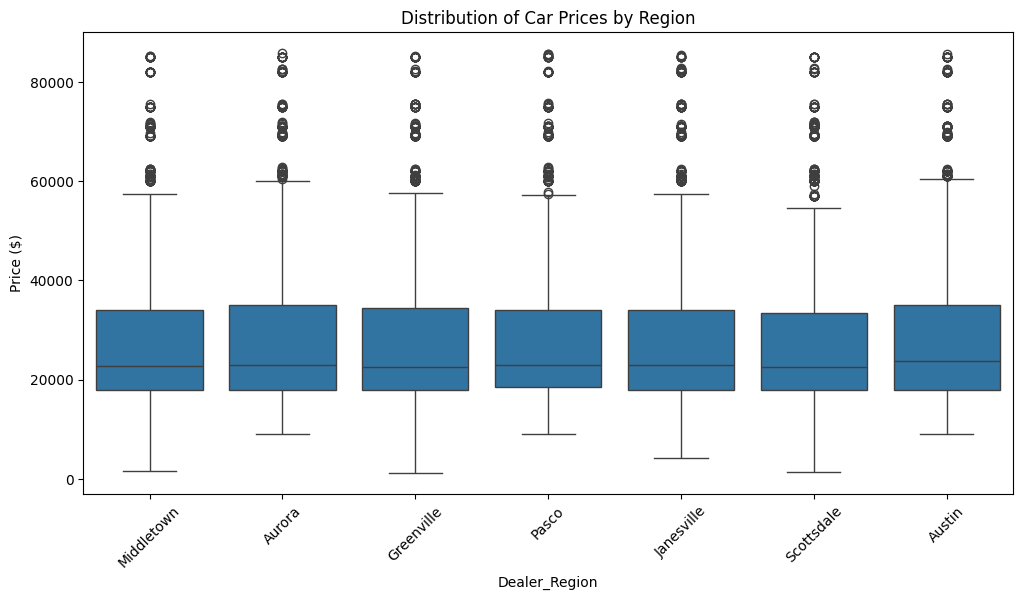

In [10]:
# 4. Distribution of car prices across different regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_data)
plt.xticks(rotation=45)
plt.title('Distribution of Car Prices by Region')
plt.show()

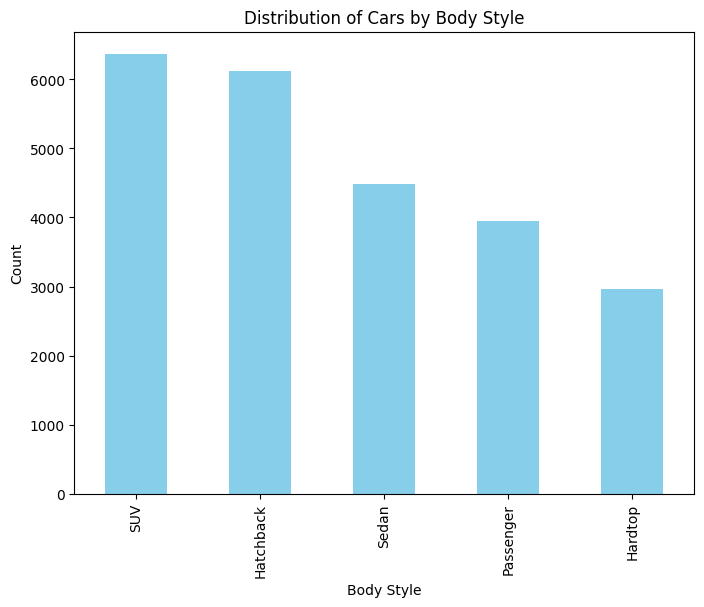

In [11]:
# 5. Distribution of cars based on body styles
body_style_counts = car_data['Body Style'].value_counts()
plt.figure(figsize=(8, 6))
body_style_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

In [12]:
# 6. Average selling price of cars by customer gender and annual income
avg_price_gender_income = car_data.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
print("Average Selling Price by Gender and Annual Income:")
print(avg_price_gender_income.head())


Average Selling Price by Gender and Annual Income:
   Gender  Annual Income     Price ($)
0  Female          13500  28132.038732
1  Female         106000  46001.000000
2  Female         121000  20000.000000
3  Female         190000  19001.000000
4  Female         211000  51000.000000


In [13]:
# 7. Distribution of car prices by region and number of cars sold
region_price_dist = car_data.groupby('Dealer_Region')['Price ($)'].describe()
region_sales = car_data['Dealer_Region'].value_counts()
print("Distribution of Car Prices by Region:")
print(region_price_dist)
print("Number of Cars Sold by Region:")
print(region_sales)

Distribution of Car Prices by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco       

In [14]:
# 8. Average car price by engine size
car_data['Engine Size'] = car_data['Engine'].str.extract('(\d+\.\d+|\d+)').astype(float)
avg_price_engine_size = car_data.groupby('Engine Size')['Price ($)'].mean()
print("Average Car Price by Engine Size:")
print(avg_price_engine_size)

Average Car Price by Engine Size:
Series([], Name: Price ($), dtype: float64)


In [15]:
# 9. Car prices based on customer annual income brackets
income_bins = [0, 25000, 50000, 100000, 200000, 500000, 1000000, 2000000]
income_labels = ['<25k', '25-50k', '50-100k', '100-200k', '200-500k', '500k-1M', '>1M']
car_data['Income Bracket'] = pd.cut(car_data['Annual Income'], bins=income_bins, labels=income_labels)
income_price_dist = car_data.groupby('Income Bracket')['Price ($)'].describe()
print("Car Prices by Income Bracket:")
print(income_price_dist)


Car Prices by Income Bracket:
                 count          mean           std      min       25%  \
Income Bracket                                                          
<25k            5275.0  27884.297820  14909.070561   1200.0  18000.00   
25-50k             0.0           NaN           NaN      NaN       NaN   
50-100k            1.0  43000.000000           NaN  43000.0  43000.00   
100-200k          15.0  22833.666667  15403.728684   9000.0  15500.00   
200-500k        2192.0  28602.538321  15087.154613   9000.0  18875.25   
500k-1M         8875.0  28011.726423  14740.941729   4200.0  18000.00   
>1M             6207.0  28016.841147  14580.010739   1450.0  18100.00   

                    50%      75%      max  
Income Bracket                             
<25k            22001.0  34000.0  85001.0  
25-50k              NaN      NaN      NaN  
50-100k         43000.0  43000.0  43000.0  
100-200k        19001.0  22000.0  69000.0  
200-500k        24000.0  36000.0  85500.0  
500k

<ipython-input-15-c1e3110fa5dd>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_price_dist = car_data.groupby('Income Bracket')['Price ($)'].describe()


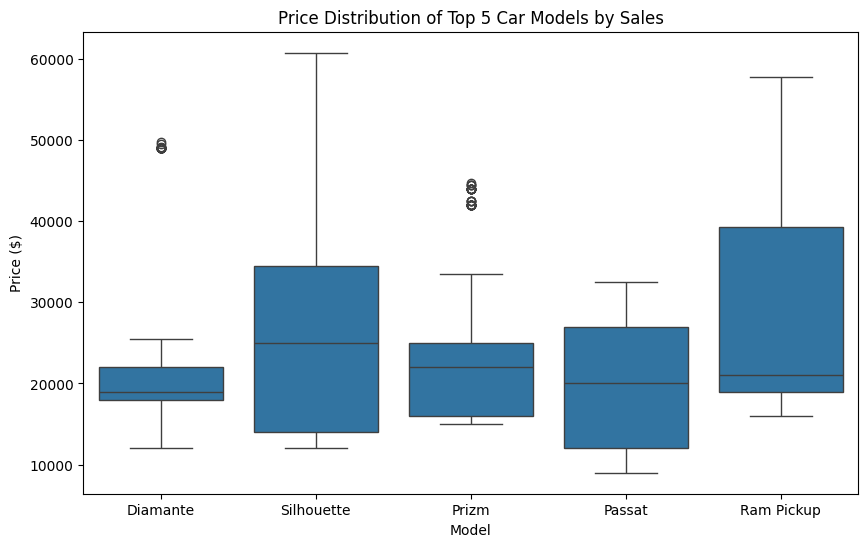

In [16]:
# 10. Top 5 car models with highest sales and their price distribution
top_models = car_data['Model'].value_counts().head(5).index
top_models_data = car_data[car_data['Model'].isin(top_models)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_models_data, order=top_models)
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.show()

In [17]:
# 11. Car price variation by engine size and color
engine_color_price = car_data.groupby(['Engine Size', 'Color'])['Price ($)'].std().reset_index()
highest_variation = engine_color_price.sort_values(by='Price ($)', ascending=False).head()
print("Highest Price Variation by Engine Size and Color:")
print(highest_variation)


Highest Price Variation by Engine Size and Color:
Empty DataFrame
Columns: [Engine Size, Color, Price ($)]
Index: []


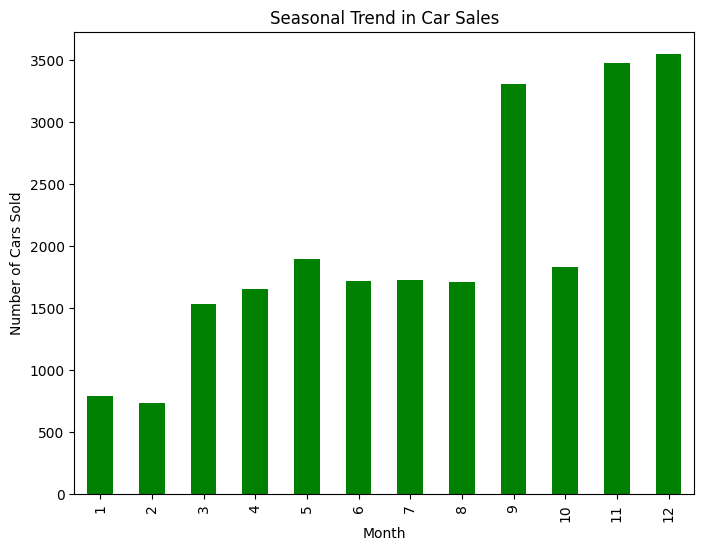

In [18]:
# 12. Seasonal trends in car sales
car_data['Date'] = pd.to_datetime(car_data['Date'])
car_data['Month'] = car_data['Date'].dt.month
monthly_sales = car_data.groupby('Month')['Car_id'].count()
plt.figure(figsize=(8, 6))
monthly_sales.plot(kind='bar', color='green')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()

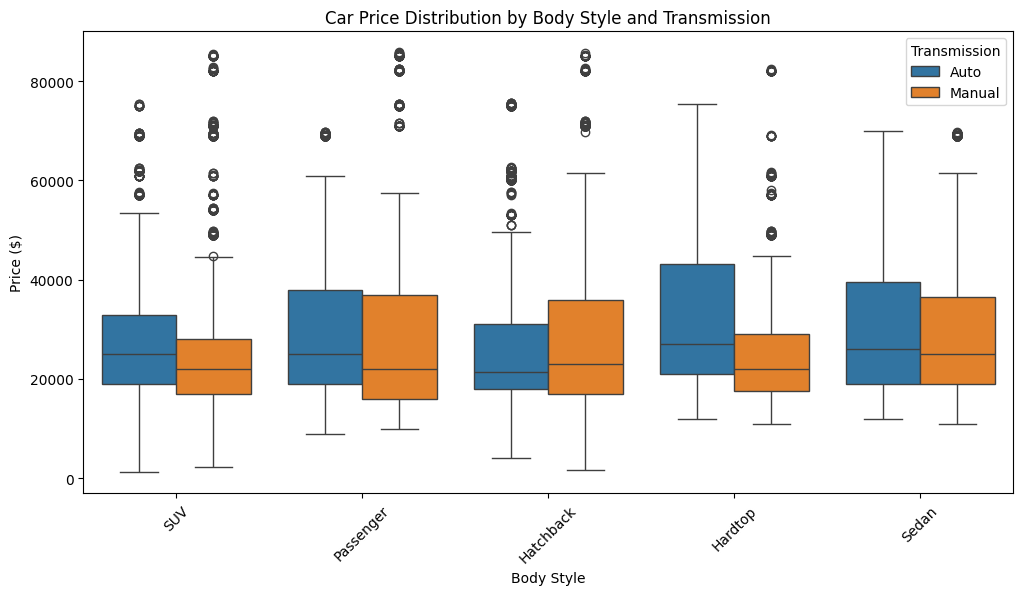

In [19]:
# 13. Car price distribution by body style and transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=car_data)
plt.title('Car Price Distribution by Body Style and Transmission')
plt.xticks(rotation=45)
plt.show()

Correlation Matrix:
               Price ($)  Engine Size  Annual Income
Price ($)       1.000000          NaN       0.012065
Engine Size          NaN          NaN            NaN
Annual Income   0.012065          NaN       1.000000


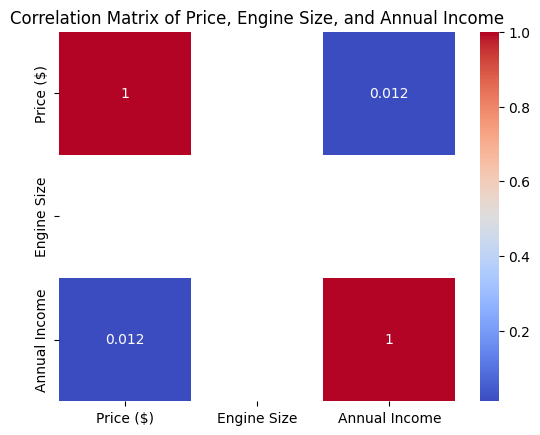

In [20]:
# 14. Correlation between price, engine size, and annual income
correlation_data = car_data[['Price ($)', 'Engine Size', 'Annual Income']].corr()
print("Correlation Matrix:")
print(correlation_data)
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Price, Engine Size, and Annual Income')
plt.show()


In [21]:
# 15. Average car price by model and engine type
avg_price_model_engine = car_data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print("Average Car Price by Model and Engine Type:")
print(avg_price_model_engine.head())

Average Car Price by Model and Engine Type:
    Model                     Engine     Price ($)
0   3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1  3000GT  DoubleÂ Overhead Camshaft  22764.326923
2  3000GT          Overhead Camshaft  21770.659864
3    300M  DoubleÂ Overhead Camshaft  21394.888889
4    323i  DoubleÂ Overhead Camshaft  16744.632287
